# Feature Engineering & Feature Extraction

## Attaching Resources

### Importing Necessary Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [64]:
x = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Predict_Health_Outcomes_of_Horses/main/Data%20Preprocessing%20%26%20EDA/eda.csv')

x

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,distend_small,57.0,8.50,serosanguious,3.4,yes,2209,0,0,no
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,...,distend_small,33.0,12.85,serosanguious,2.0,yes,2208,0,0,no
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,...,distend_large,37.0,6.40,serosanguious,3.4,yes,5124,0,0,no
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,...,distend_small,53.0,7.00,cloudy,3.9,yes,2208,0,0,yes
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,...,normal,47.0,7.30,cloudy,2.6,no,0,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,depressed,...,distend_large,57.0,12.85,serosanguious,2.0,yes,2206,0,0,no
1231,yes,adult,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,...,distend_small,35.0,6.40,serosanguious,3.6,yes,2209,0,0,yes
1232,yes,young,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,mild_pain,...,firm,40.0,5.90,cloudy,7.0,yes,400,0,0,yes
1233,yes,adult,38.1,70.0,16.0,normal,reduced,bright_red,less_3_sec,mild_pain,...,distend_small,58.0,12.85,cloudy,2.0,yes,2209,0,0,no


In [65]:
y = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Predict_Health_Outcomes_of_Horses/main/Data%20Preprocessing%20%26%20EDA/y.csv')

y

,outcome
0,0
1,1
2,2
3,2
4,2
...,...
1230,2
1231,0
1232,2
1233,2


### Converting Categorical Data to Numerical Data

In [66]:
le = LabelEncoder()

In [67]:
x['surgery'] = le.fit_transform(x['surgery'])
x['age'] = le.fit_transform(x['age'])
x['temp_of_extremities'] = le.fit_transform(x['temp_of_extremities'])
x['peripheral_pulse'] = le.fit_transform(x['peripheral_pulse'])
x['mucous_membrane'] = le.fit_transform(x['mucous_membrane'])
x['capillary_refill_time'] = le.fit_transform(x['capillary_refill_time'])
x['pain'] = le.fit_transform(x['pain'])
x['peristalsis'] = le.fit_transform(x['peristalsis'])
x['abdominal_distention'] = le.fit_transform(x['abdominal_distention'])
x['nasogastric_tube'] = le.fit_transform(x['nasogastric_tube'])
x['nasogastric_reflux'] = le.fit_transform(x['nasogastric_reflux'])
x['rectal_exam_feces'] = le.fit_transform(x['rectal_exam_feces'])
x['abdomen'] = le.fit_transform(x['abdomen'])
x['abdomo_appearance'] = le.fit_transform(x['abdomo_appearance'])
x['surgical_lesion'] = le.fit_transform(x['surgical_lesion'])
x['cp_data'] = le.fit_transform(x['cp_data'])

x

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1,0,38.1,132.0,24.0,1,3,2,2,1,...,1,57.0,8.50,2,3.4,1,2209,0,0,0
1,1,0,37.5,88.0,12.0,1,2,4,2,3,...,1,33.0,12.85,2,2.0,1,2208,0,0,0
2,1,0,38.3,120.0,28.0,1,3,5,1,2,...,0,37.0,6.40,2,3.4,1,5124,0,0,0
3,1,0,37.1,72.0,30.0,0,3,5,2,3,...,1,53.0,7.00,1,3.9,1,2208,0,0,1
4,0,0,38.0,52.0,48.0,2,2,3,1,0,...,3,47.0,7.30,1,2.6,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1,0,38.5,129.0,48.0,1,3,5,2,1,...,0,57.0,12.85,2,2.0,1,2206,0,0,0
1231,1,0,37.5,60.0,50.0,1,3,4,1,3,...,1,35.0,6.40,2,3.6,1,2209,0,0,1
1232,1,1,37.5,84.0,40.0,2,3,3,1,3,...,2,40.0,5.90,1,7.0,1,400,0,0,1
1233,1,0,38.1,70.0,16.0,2,3,1,1,3,...,1,58.0,12.85,1,2.0,1,2209,0,0,0


In [68]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   int32  
 1   age                    1235 non-null   int32  
 2   rectal_temp            1235 non-null   float64
 3   pulse                  1235 non-null   float64
 4   respiratory_rate       1235 non-null   float64
 5   temp_of_extremities    1235 non-null   int32  
 6   peripheral_pulse       1235 non-null   int32  
 7   mucous_membrane        1235 non-null   int32  
 8   capillary_refill_time  1235 non-null   int32  
 9   pain                   1235 non-null   int32  
 10  peristalsis            1235 non-null   int32  
 11  abdominal_distention   1235 non-null   int32  
 12  nasogastric_tube       1235 non-null   int32  
 13  nasogastric_reflux     1235 non-null   int32  
 14  nasogastric_reflux_ph  1235 non-null   float64
 15  rect

## Performing Feature Selection

### Performing Univariate Selection

In [69]:
test = SelectKBest(score_func=chi2, k=5)
test.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x00000288EA7F82C0>)

In [70]:
test.scores_

array([8.91979789e+00, 5.19993581e+01, 1.96054135e-02, 1.54985373e+03,
       3.09751872e+02, 4.01007220e+01, 9.12854101e+00, 4.05176317e+00,
       1.80329115e+01, 1.53427866e+00, 7.72001197e+01, 2.06119701e+01,
       9.23947544e-01, 1.53776381e+00, 1.38442291e+02, 7.10544667e+01,
       4.13259444e+01, 2.68899511e+02, 2.25278439e+02, 7.65485113e+01,
       5.99671214e+01, 2.23521135e+01, 9.77153910e+03, 1.30331137e+04,
       3.39289883e+03, 3.66875802e+01])

In [71]:
chi_test = pd.DataFrame(test.scores_).T
chi_test.columns = x.columns

chi_test

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,8.919798,51.999358,0.019605,1549.853725,309.751872,40.100722,9.128541,4.051763,18.032911,1.534279,...,41.325944,268.899511,225.278439,76.548511,59.967121,22.352114,9771.539105,13033.113741,3392.898826,36.68758


### Performing Recursive Feature Elimination

In [72]:
rfe = RFE(LogisticRegression())
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [73]:
rfe.get_support()

array([ True,  True, False, False, False,  True, False, False,  True,
       False, False, False,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True, False,  True])

In [74]:
rfe_df = pd.DataFrame(rfe.ranking_).T
rfe_df.columns = x.columns
rfe_df

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1,1,8,12,11,1,2,6,1,7,...,1,10,1,1,9,1,14,1,13,1


### Performing Tree Based method

In [75]:
dt = DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [76]:

dt.feature_importances_

array([0.0144806 , 0.00720665, 0.06415866, 0.14716972, 0.05162695,
       0.01987323, 0.01690327, 0.03567579, 0.00853257, 0.06957867,
       0.00975296, 0.02428194, 0.00517277, 0.01054963, 0.02835441,
       0.01582017, 0.03986354, 0.07086701, 0.16454348, 0.04452803,
       0.06133685, 0.01605578, 0.06822299, 0.        , 0.        ,
       0.00544434])

In [77]:
imp_cols = pd.DataFrame({
    'Features' : x.columns,
    'CHI' : test.scores_,
    'RFE_RANK' : rfe.ranking_,
    'RFE_SUP' : rfe.get_support(),
    'IG' : dt.feature_importances_
})

imp_cols

,Features,CHI,RFE_RANK,RFE_SUP,IG
0,surgery,8.919798,1,True,0.014481
1,age,51.999358,1,True,0.007207
2,rectal_temp,0.019605,8,False,0.064159
3,pulse,1549.853725,12,False,0.147170
4,respiratory_rate,309.751872,11,False,0.051627
5,temp_of_extremities,40.100722,1,True,0.019873
6,peripheral_pulse,9.128541,2,False,0.016903
7,mucous_membrane,4.051763,6,False,0.035676
8,capillary_refill_time,18.032911,1,True,0.008533
9,pain,1.534279,7,False,0.069579


### Compairing All Result

In [78]:
r = chi_test.T
r.columns = ['chi_test']

r.sort_values(by='chi_test', ascending=False)

,chi_test
lesion_2,13033.113741
lesion_1,9771.539105
lesion_3,3392.898826
pulse,1549.853725
respiratory_rate,309.751872
packed_cell_volume,268.899511
total_protein,225.278439
nasogastric_reflux_ph,138.442291
peristalsis,77.200120
abdomo_appearance,76.548511


In [79]:
r2 = rfe_df.T
r2.columns = ['rfe']

r2.sort_values(by='rfe')

,rfe
surgery,1
lesion_2,1
surgical_lesion,1
abdomo_appearance,1
total_protein,1
abdomen,1
nasogastric_reflux_ph,1
nasogastric_reflux,1
nasogastric_tube,1
cp_data,1


<Axes: >

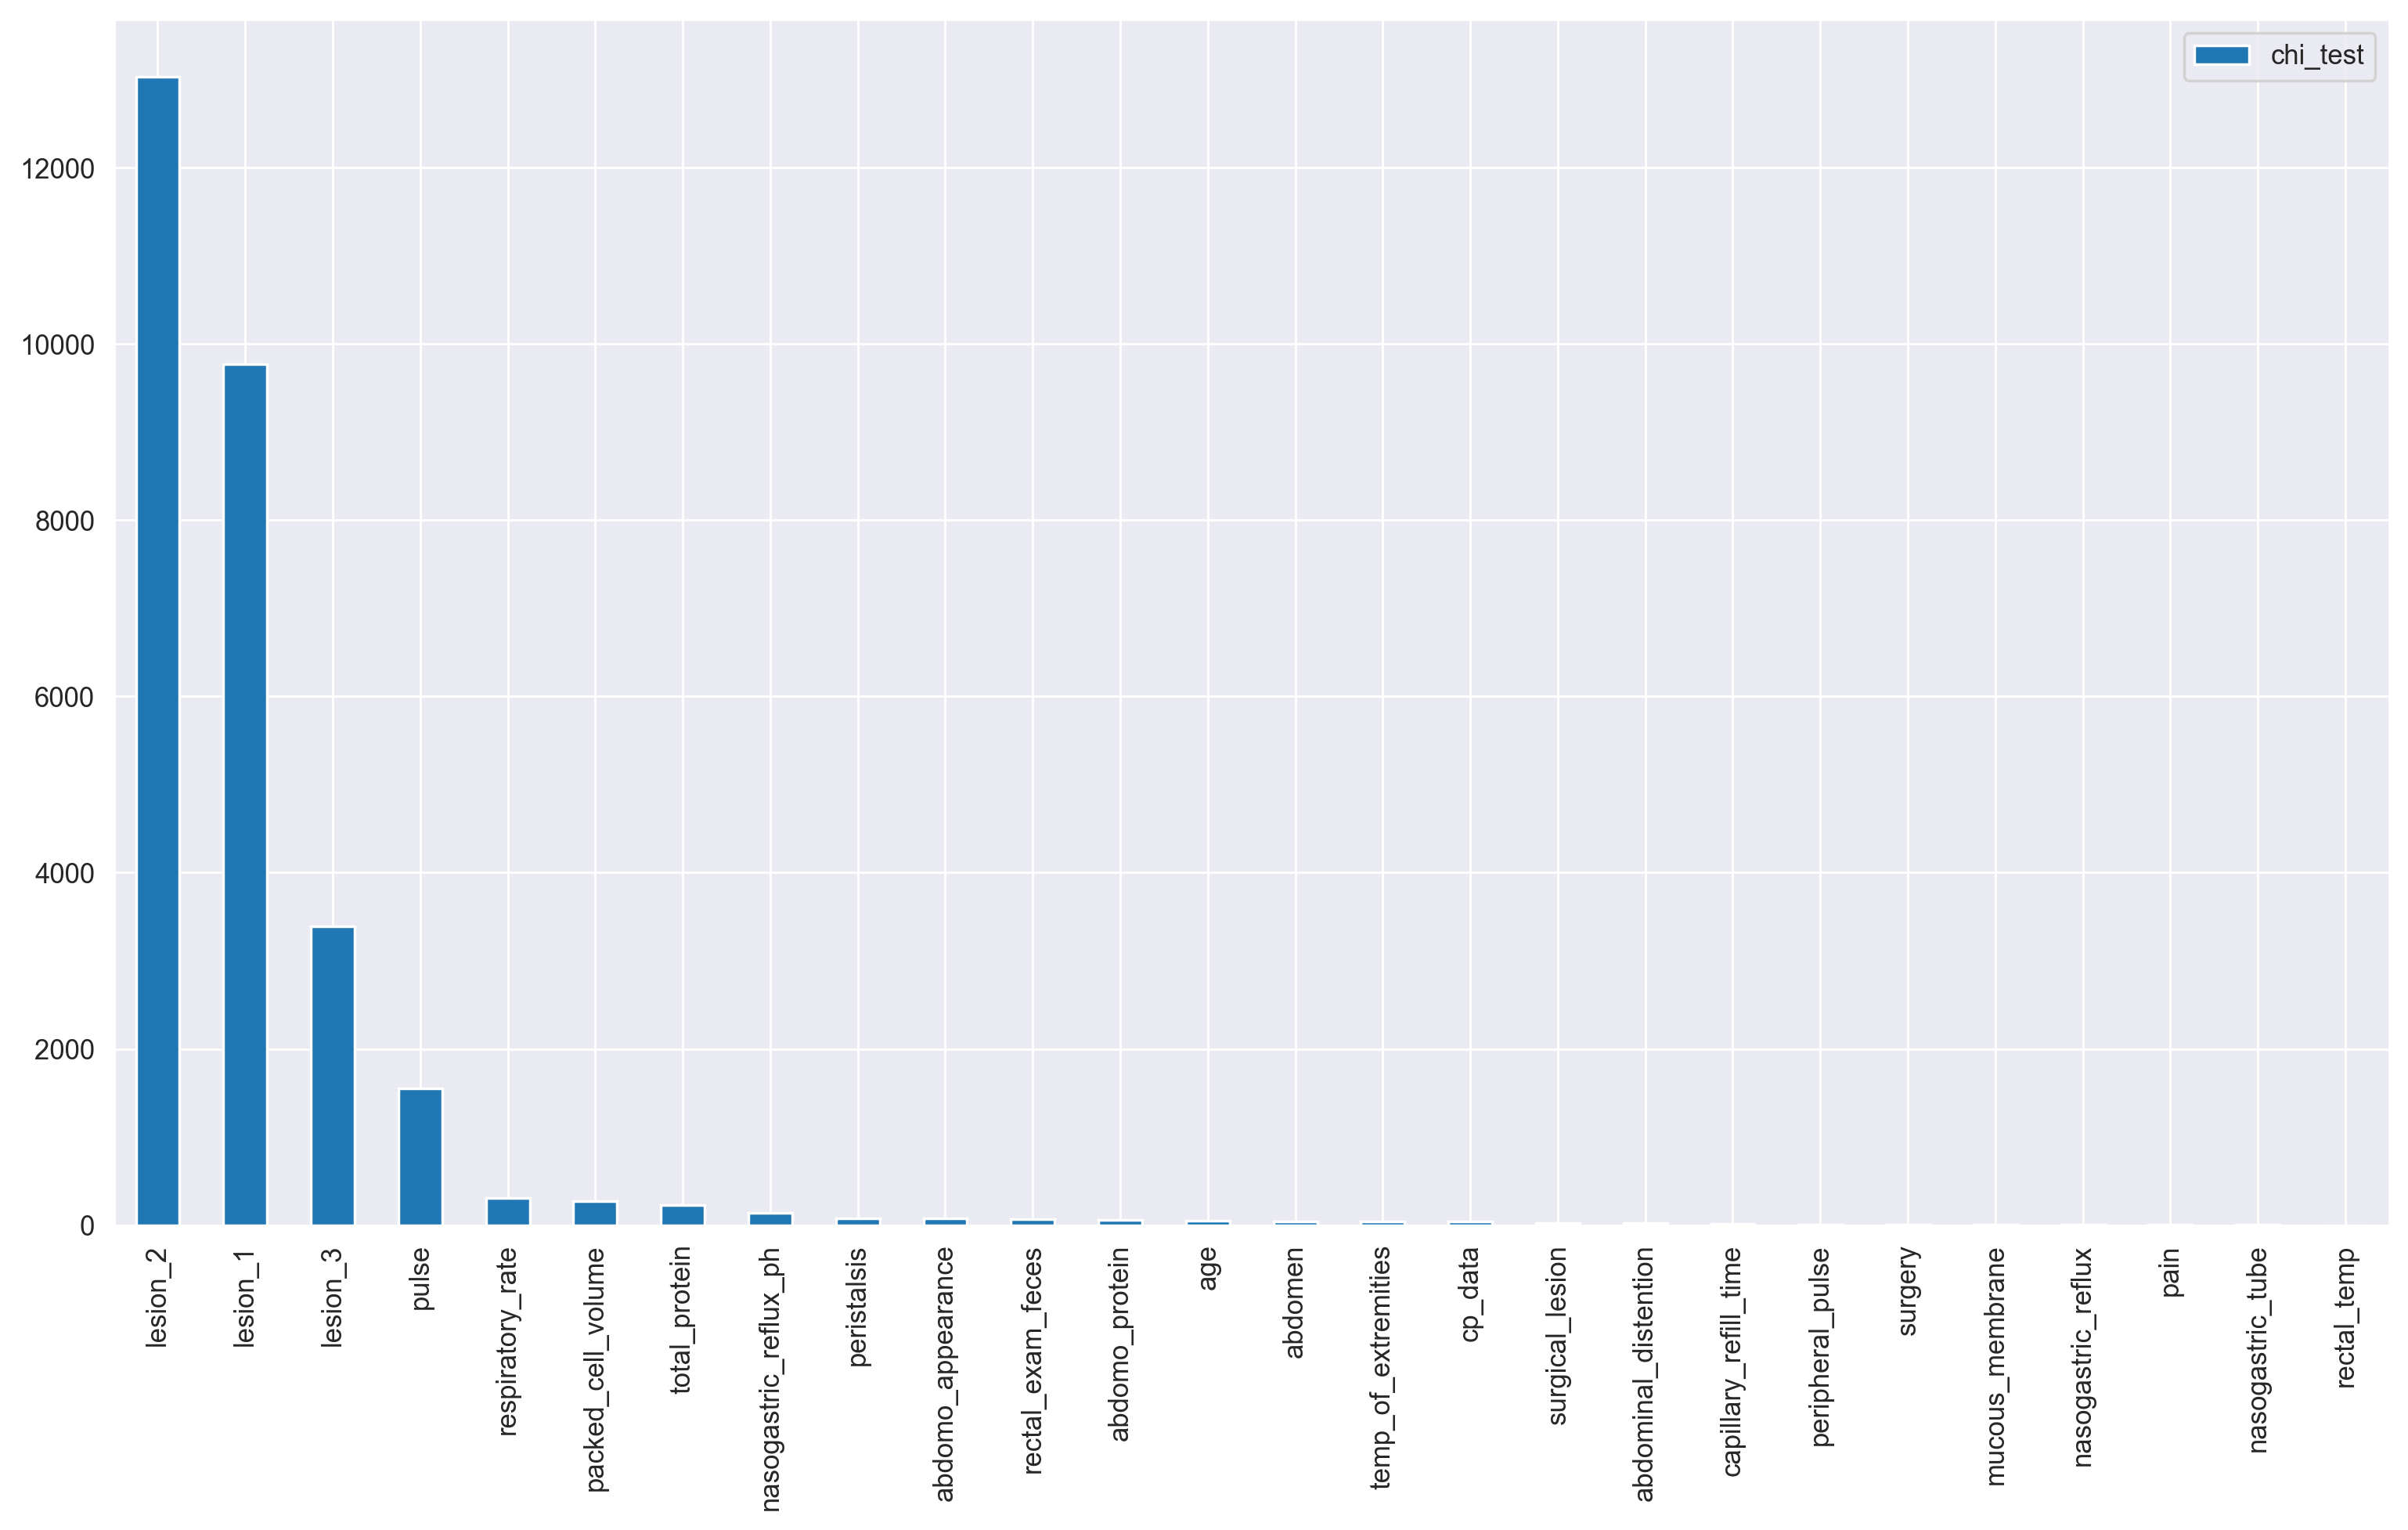

In [80]:
r.sort_values(by='chi_test', ascending=False).plot(kind='bar')

<Axes: >

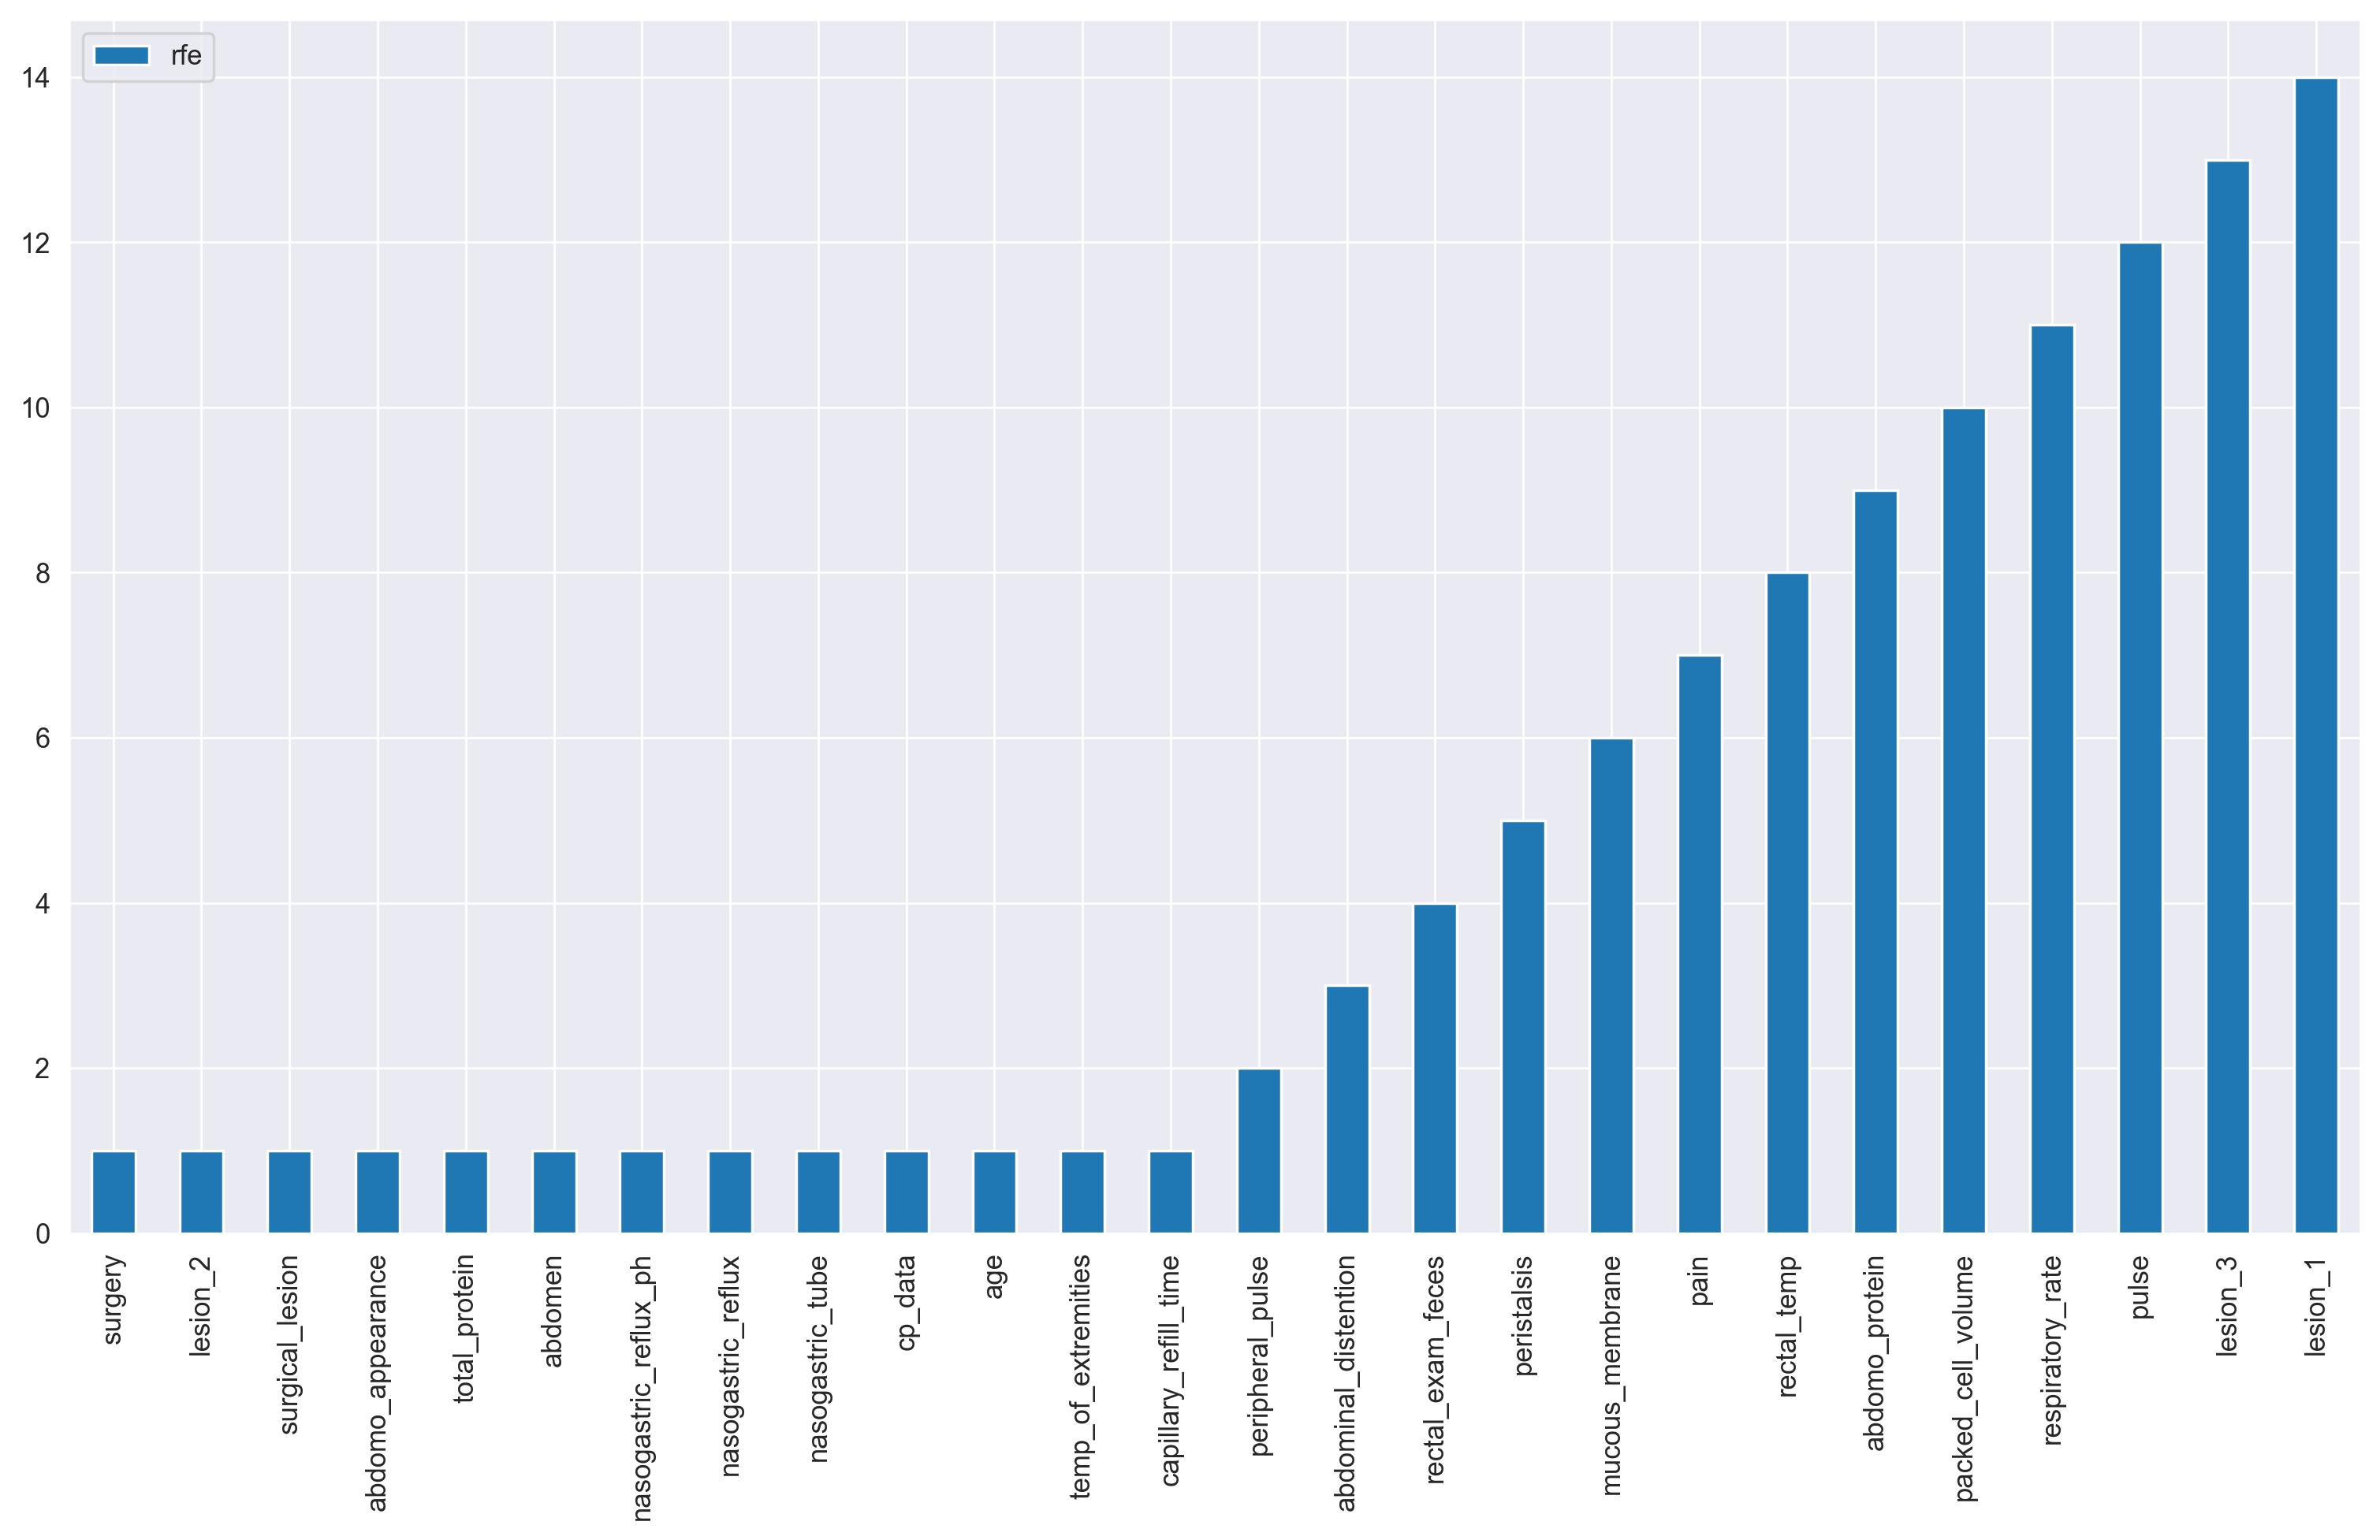

In [81]:
r2.sort_values(by='rfe').plot(kind='bar')

<Axes: xlabel='IG', ylabel='Features'>

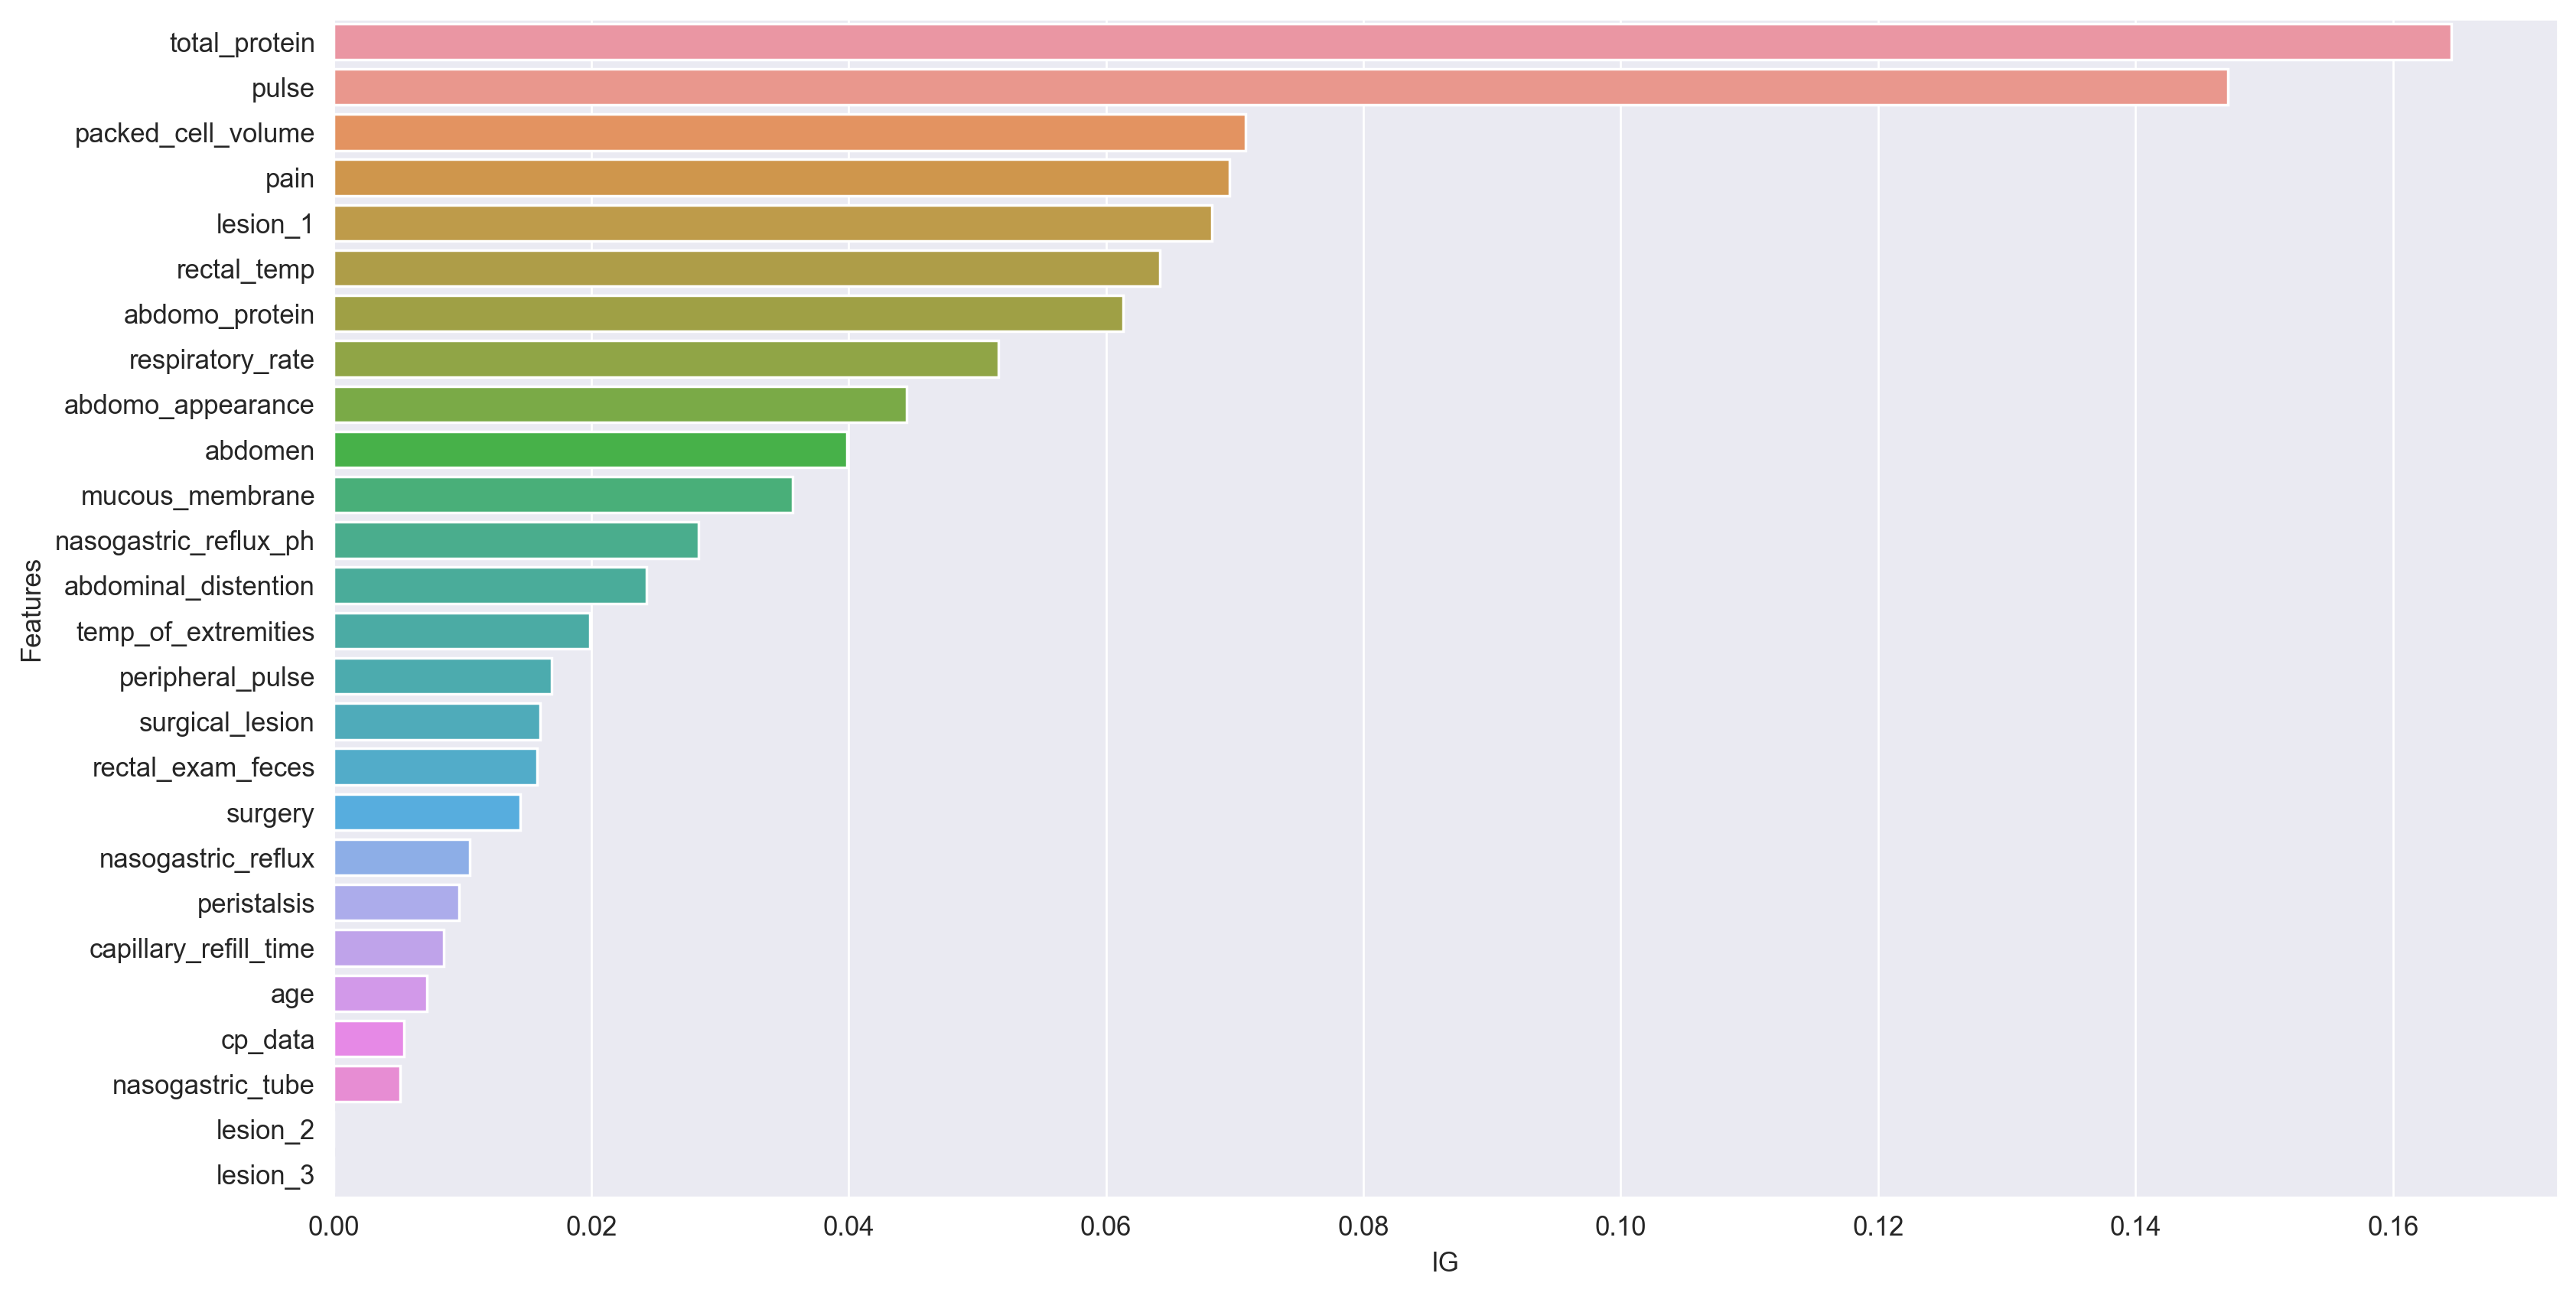

In [82]:
sns.barplot(x = imp_cols.sort_values(by='IG', ascending=False).loc[:,'IG'],
            y = imp_cols.sort_values(by='IG', ascending=False).loc[:,'Features'])

### Picking Features After Feature Engineering

In [83]:
fs = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Predict_Health_Outcomes_of_Horses/main/Feature%20Engineering%20%26%20Feature%20Extraction/Feature%20Selection.csv')

fs

,Features,CHI,RFE_RANK,IG,Selection
0,surgery,8.919798,1,0.011280,NO
1,age,51.999358,1,0.007420,HIGH
2,rectal_temp,0.019605,7,0.072587,LOW
3,pulse,1549.853725,11,0.160902,YES
4,respiratory_rate,309.751872,10,0.043179,YES
5,temp_of_extremities,40.100722,1,0.021666,HIGH
6,peripheral_pulse,9.128541,1,0.014229,NO
7,mucous_membrane,4.051763,5,0.036963,NO
8,capillary_refill_time,18.032911,1,0.006079,NO
9,pain,1.534279,1,0.073313,YES


#### Filtering Columns

In [84]:
ch = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Predict_Health_Outcomes_of_Horses/main/Data%20Preprocessing%20%26%20EDA/eda.csv')

In [85]:
test = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Predict_Health_Outcomes_of_Horses/main/Resources/test.csv').drop(columns=['id','hospital_number'])

test

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.6,40.0,20.0,normal,normal,normal_pink,less_3_sec,mild_pain,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,yes,adult,38.2,112.0,48.0,cool,reduced,bright_pink,more_3_sec,depressed,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,yes,adult,37.7,66.0,12.0,cool,normal,bright_red,less_3_sec,mild_pain,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,no,adult,37.1,88.0,20.0,cool,reduced,pale_cyanotic,less_3_sec,depressed,...,distend_large,75.0,81.0,None,1.0,yes,1400,0,0,no
4,yes,adult,38.3,50.0,12.0,None,normal,bright_pink,less_3_sec,mild_pain,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,no,adult,40.3,114.0,36.0,cool,reduced,normal_pink,more_3_sec,depressed,...,distend_large,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes
820,yes,adult,37.2,100.0,20.0,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,...,distend_small,50.0,66.0,serosanguious,2.0,yes,2209,0,0,no
821,yes,adult,39.2,132.0,12.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,None,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no
822,no,adult,38.3,54.0,66.0,normal,normal,normal_pink,less_3_sec,mild_pain,...,None,49.0,8.6,clear,5.0,no,3111,0,0,yes


In [86]:
x = ch.iloc[:,fs[(fs['Selection'] == 'YES') | ( fs['Selection'] == 'HIGH')].index]

x

,age,pulse,respiratory_rate,temp_of_extremities,pain,peristalsis,nasogastric_reflux_ph,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein
0,adult,132.0,24.0,cool,depressed,absent,6.5,distend_small,57.0,8.50,serosanguious,3.4
1,adult,88.0,12.0,cool,mild_pain,absent,2.0,distend_small,33.0,12.85,serosanguious,2.0
2,adult,120.0,28.0,cool,extreme_pain,hypomotile,3.5,distend_large,37.0,6.40,serosanguious,3.4
3,adult,72.0,30.0,cold,mild_pain,hypomotile,2.0,distend_small,53.0,7.00,cloudy,3.9
4,adult,52.0,48.0,normal,alert,hypomotile,7.0,normal,47.0,7.30,cloudy,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...
1230,adult,129.0,48.0,cool,depressed,absent,2.0,distend_large,57.0,12.85,serosanguious,2.0
1231,adult,60.0,50.0,cool,mild_pain,hypomotile,3.0,distend_small,35.0,6.40,serosanguious,3.6
1232,young,84.0,40.0,normal,mild_pain,hypomotile,3.0,firm,40.0,5.90,cloudy,7.0
1233,adult,70.0,16.0,normal,mild_pain,hypomotile,2.0,distend_small,58.0,12.85,cloudy,2.0


In [87]:
x = pd.get_dummies(x)

x

,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,...,peristalsis_hypomotile,peristalsis_normal,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious
0,132.0,24.0,6.5,57.0,8.50,3.4,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,88.0,12.0,2.0,33.0,12.85,2.0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,120.0,28.0,3.5,37.0,6.40,3.4,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
3,72.0,30.0,2.0,53.0,7.00,3.9,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
4,52.0,48.0,7.0,47.0,7.30,2.6,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,129.0,48.0,2.0,57.0,12.85,2.0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1231,60.0,50.0,3.0,35.0,6.40,3.6,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1232,84.0,40.0,3.0,40.0,5.90,7.0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1233,70.0,16.0,2.0,58.0,12.85,2.0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [88]:
test = test.iloc[:,fs[(fs['Selection'] == 'YES') | ( fs['Selection'] == 'HIGH')].index]

test

,age,pulse,respiratory_rate,temp_of_extremities,pain,peristalsis,nasogastric_reflux_ph,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein
0,adult,40.0,20.0,normal,mild_pain,hypomotile,7.0,distend_small,42.0,7.5,clear,2.3
1,adult,112.0,48.0,cool,depressed,hypomotile,3.5,distend_small,44.0,6.0,serosanguious,2.6
2,adult,66.0,12.0,cool,mild_pain,hypomotile,3.0,distend_small,31.5,6.0,cloudy,1.6
3,adult,88.0,20.0,cool,depressed,absent,2.0,distend_large,75.0,81.0,None,1.0
4,adult,50.0,12.0,None,mild_pain,absent,3.0,distend_small,37.0,6.8,cloudy,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...
819,adult,114.0,36.0,cool,depressed,hypomotile,7.0,distend_large,57.0,8.1,serosanguious,4.5
820,adult,100.0,20.0,cool,extreme_pain,absent,2.0,distend_small,50.0,66.0,serosanguious,2.0
821,adult,132.0,12.0,cool,depressed,hypomotile,6.5,None,53.0,7.6,serosanguious,4.5
822,adult,54.0,66.0,normal,mild_pain,hypomotile,7.0,None,49.0,8.6,clear,5.0


In [89]:
test = pd.get_dummies(test)

test

,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,age_adult,age_young,temp_of_extremities_None,temp_of_extremities_cold,...,abdomen_None,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_None,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious
0,40.0,20.0,7.0,42.0,7.5,2.3,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,112.0,48.0,3.5,44.0,6.0,2.6,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,66.0,12.0,3.0,31.5,6.0,1.6,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,88.0,20.0,2.0,75.0,81.0,1.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,50.0,12.0,3.0,37.0,6.8,2.6,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,114.0,36.0,7.0,57.0,8.1,4.5,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
820,100.0,20.0,2.0,50.0,66.0,2.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
821,132.0,12.0,6.5,53.0,7.6,4.5,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
822,54.0,66.0,7.0,49.0,8.6,5.0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


## Normalizing The Dataset

In [90]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [91]:
scaled_x

,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,...,peristalsis_hypomotile,peristalsis_normal,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious
0,1.812444,-0.375191,1.093380,0.702421,0.013902,0.082074,0.254274,-0.254274,-0.329572,0.819254,...,-1.114172,-0.211753,-0.640170,0.881464,-0.248815,-0.256074,-0.165693,-0.513881,-0.640170,0.999191
1,0.292564,-1.248358,-1.230314,-1.576449,1.662527,-0.832565,0.254274,-0.254274,-0.329572,0.819254,...,-1.114172,-0.211753,-0.640170,0.881464,-0.248815,-0.256074,-0.165693,-0.513881,-0.640170,0.999191
2,1.397931,-0.084135,-0.455749,-1.196638,-0.781987,0.082074,0.254274,-0.254274,-0.329572,0.819254,...,0.897527,-0.211753,1.562086,-1.134477,-0.248815,-0.256074,-0.165693,-0.513881,-0.640170,0.999191
3,-0.260119,0.061393,-1.230314,0.322609,-0.554590,0.408731,0.254274,-0.254274,3.034240,-1.220623,...,0.897527,-0.211753,-0.640170,0.881464,-0.248815,-0.256074,-0.165693,-0.513881,1.562086,-1.000810
4,-0.950974,1.371144,1.351568,-0.247108,-0.440892,-0.440577,0.254274,-0.254274,-0.329572,-1.220623,...,0.897527,-0.211753,-0.640170,-1.134477,-0.248815,3.905125,-0.165693,-0.513881,1.562086,-1.000810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1.708815,1.371144,-1.230314,0.702421,1.662527,-0.832565,0.254274,-0.254274,-0.329572,0.819254,...,-1.114172,-0.211753,1.562086,-1.134477,-0.248815,-0.256074,-0.165693,-0.513881,-0.640170,0.999191
1231,-0.674632,1.516672,-0.713937,-1.386544,-0.781987,0.212737,0.254274,-0.254274,-0.329572,0.819254,...,0.897527,-0.211753,-0.640170,0.881464,-0.248815,-0.256074,-0.165693,-0.513881,-0.640170,0.999191
1232,0.154393,0.789032,-0.713937,-0.911779,-0.971484,2.434005,-3.932768,3.932768,-0.329572,-1.220623,...,0.897527,-0.211753,-0.640170,-1.134477,4.019052,-0.256074,-0.165693,-0.513881,1.562086,-1.000810
1233,-0.329205,-0.957303,-1.230314,0.797374,1.662527,-0.832565,0.254274,-0.254274,-0.329572,-1.220623,...,0.897527,-0.211753,-0.640170,0.881464,-0.248815,-0.256074,-0.165693,-0.513881,1.562086,-1.000810


In [92]:
scaled_test  = pd.DataFrame(sc.fit_transform(test), columns=test.columns)

scaled_test

,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,age_adult,age_young,temp_of_extremities_None,temp_of_extremities_cold,...,abdomen_None,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_None,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious
0,-1.380223,-0.615318,1.323635,-0.676320,-0.503692,-0.673744,0.231751,-0.231751,-0.210618,-0.341367,...,-0.479428,-0.641061,1.274443,-0.254164,-0.207456,-0.201008,-0.197717,1.925765,-0.624135,-0.941054
1,1.090013,0.991907,-0.535772,-0.484819,-0.560515,-0.478723,0.231751,-0.231751,-0.210618,-0.341367,...,-0.479428,-0.641061,1.274443,-0.254164,-0.207456,-0.201008,-0.197717,-0.519274,-0.624135,1.062638
2,-0.488193,-1.074525,-0.801402,-1.681702,-0.560515,-1.128791,0.231751,-0.231751,-0.210618,-0.341367,...,-0.479428,-0.641061,1.274443,-0.254164,-0.207456,-0.201008,-0.197717,-0.519274,1.602217,-0.941054
3,0.266601,-0.615318,-1.332661,2.483451,2.280657,-1.518832,0.231751,-0.231751,-0.210618,-0.341367,...,-0.479428,1.559915,-0.784657,-0.254164,-0.207456,-0.201008,5.057731,-0.519274,-0.624135,-0.941054
4,-1.037135,-1.074525,-0.801402,-1.155073,-0.530210,-0.478723,0.231751,-0.231751,4.747932,-0.341367,...,-0.479428,-0.641061,1.274443,-0.254164,-0.207456,-0.201008,-0.197717,-0.519274,1.602217,-0.941054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1.158631,0.303096,1.323635,0.759939,-0.480963,0.756406,0.231751,-0.231751,-0.210618,-0.341367,...,-0.479428,1.559915,-0.784657,-0.254164,-0.207456,-0.201008,-0.197717,-0.519274,-0.624135,1.062638
820,0.678307,-0.615318,-1.332661,0.089685,1.712422,-0.868764,0.231751,-0.231751,-0.210618,-0.341367,...,-0.479428,-0.641061,1.274443,-0.254164,-0.207456,-0.201008,-0.197717,-0.519274,-0.624135,1.062638
821,1.776190,-1.074525,1.058005,0.376937,-0.499904,0.756406,0.231751,-0.231751,-0.210618,-0.341367,...,2.085821,-0.641061,-0.784657,-0.254164,-0.207456,-0.201008,-0.197717,-0.519274,-0.624135,1.062638
822,-0.899899,2.025123,1.323635,-0.006066,-0.462021,1.081440,0.231751,-0.231751,-0.210618,-0.341367,...,2.085821,-0.641061,-0.784657,-0.254164,-0.207456,-0.201008,-0.197717,1.925765,-0.624135,-0.941054


## Performing Dimension Reductionality

### Creating PCA With Default Value

In [93]:
pca_def = PCA()
pcs_def = pca_def.fit_transform(scaled_x)
pcs_def

array([[-2.57551494e+00,  4.97438786e-01,  4.37356428e-01, ...,
         1.84020805e-15, -1.03013144e-15,  1.29294700e-15],
       [-9.69470554e-01, -1.60062675e+00, -1.00394507e+00, ...,
         1.43034814e-15, -1.27922874e-15, -1.09553333e-15],
       [-1.01104302e+00, -7.67765212e-03, -1.23220108e+00, ...,
        -2.59696598e-16,  1.47607062e-15,  2.20086611e-16],
       ...,
       [ 2.39338919e+00,  4.85953104e+00,  5.46376650e-01, ...,
        -4.20423324e-16,  7.67907459e-17,  3.02429199e-16],
       [ 1.56167160e+00, -1.31120313e+00, -1.19213868e+00, ...,
         1.40284952e-16,  1.07590855e-16,  3.43077698e-17],
       [ 1.58116316e+00, -6.29418275e-01,  4.57206224e-01, ...,
         5.30225418e-18, -1.22641641e-16,  8.73637721e-17]])

In [94]:
pca_def.explained_variance_ratio_

array([1.40112046e-01, 8.17611559e-02, 6.85699154e-02, 6.13198318e-02,
       5.28731968e-02, 5.16447360e-02, 4.67796485e-02, 4.58026061e-02,
       3.99279537e-02, 3.63937978e-02, 3.60114269e-02, 3.52259849e-02,
       3.26067666e-02, 3.20420904e-02, 3.14715835e-02, 2.84475966e-02,
       2.70009545e-02, 2.51441422e-02, 2.38681397e-02, 2.22182651e-02,
       2.11307946e-02, 1.80627678e-02, 1.56302407e-02, 1.36161895e-02,
       1.23381692e-02, 2.76322288e-32, 1.13761169e-32, 6.96318275e-33,
       5.79585823e-33, 5.11968410e-33, 6.44652656e-34])

In [95]:
np.cumsum(pca_def.explained_variance_ratio_)

array([0.14011205, 0.2218732 , 0.29044312, 0.35176295, 0.40463615,
       0.45628088, 0.50306053, 0.54886314, 0.58879109, 0.62518489,
       0.66119631, 0.6964223 , 0.72902907, 0.76107116, 0.79254274,
       0.82099034, 0.84799129, 0.87313543, 0.89700357, 0.91922184,
       0.94035263, 0.9584154 , 0.97404564, 0.98766183, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

- As it is clear that 100% of the data came from the first column alone, we will use n component 8.

### Creating PCA With 25 Component

In [96]:
pca_25 = PCA(n_components = 25)
pcs_25_train = pca_25.fit_transform(scaled_x)
pcs_25_train

array([[-2.57551494,  0.49743879,  0.43735643, ..., -0.26068388,
         0.91444579,  0.71141023],
       [-0.96947055, -1.60062675, -1.00394507, ..., -0.16561208,
         0.81737463,  1.13707122],
       [-1.01104302, -0.00767765, -1.23220108, ...,  0.80030904,
         1.36242412,  0.51850582],
       ...,
       [ 2.39338919,  4.85953104,  0.54637665, ...,  1.05653063,
        -0.61908145, -0.67351106],
       [ 1.5616716 , -1.31120313, -1.19213868, ...,  0.43009063,
         0.01866012,  0.15984829],
       [ 1.58116316, -0.62941828,  0.45720622, ..., -0.04413243,
         0.05101928, -1.33085958]])

In [97]:
pcs_25_test = pca_25.fit_transform(scaled_test)
pcs_25_test

array([[-3.29011682, -0.24902539, -0.71503433, ...,  0.24215287,
        -0.32895917, -0.48037967],
       [ 1.37380588, -0.45315549, -1.38356466, ...,  0.40267676,
         0.7942936 ,  0.13750885],
       [-1.91066053, -0.96532874, -0.30008536, ...,  0.74211393,
        -0.02564742,  0.03103165],
       ...,
       [ 1.27492794,  0.78969281, -1.5921456 , ..., -0.49593537,
        -0.3400903 ,  0.33247794],
       [-2.37936356,  1.76627867, -0.56071902, ..., -0.341536  ,
         1.42933955,  0.26291556],
       [-1.31731382, -0.95849327,  0.97001133, ...,  1.21296893,
        -0.128636  , -0.14877584]])

#### Creating DataFrame

In [98]:
def col_pc_n(n):

    col = []
    p = 'pc'

    for i in range(0,n):
        col_n = p + str(i)
        col.append(col_n)

    return col

In [100]:
ch_scaled_pca = pd.DataFrame(pcs_25_train, columns=col_pc_n(25))
ch_scaled_pca['outcome'] = y

ch_scaled_pca

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,outcome
0,-2.575515,0.497439,0.437356,-0.322301,-0.465205,-1.730869,-0.237628,-0.584094,0.445372,0.175977,...,-0.500667,0.573039,0.338492,0.558939,0.045085,0.414778,-0.260684,0.914446,0.711410,0
1,-0.969471,-1.600627,-1.003945,1.657998,-0.053170,-0.631209,0.006702,1.559572,0.895931,1.338742,...,0.225546,-0.180210,0.968270,0.467613,1.102725,-0.627489,-0.165612,0.817375,1.137071,1
2,-1.011043,-0.007678,-1.232201,-2.432332,1.080307,1.153215,-0.767159,1.575246,-0.214572,0.564828,...,0.102726,0.743997,-0.992582,-1.176858,0.234520,-0.364848,0.800309,1.362424,0.518506,2
3,0.725174,-0.018967,-0.845251,1.515358,-1.719031,0.825511,-0.851060,-0.725050,-1.785629,1.080272,...,-0.614344,-2.365209,-0.599351,-0.355970,-0.844221,-0.463359,0.500271,-0.137370,-0.694712,2
4,3.174010,0.706511,2.101939,-0.691820,1.185200,-0.536205,-0.005468,-1.422497,-1.377087,-0.256469,...,0.816228,-0.301702,0.182504,0.570636,0.835676,-0.514380,-2.616939,0.215444,-0.106105,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,-3.448542,-1.654296,0.605183,-0.904145,0.462370,0.865430,1.308897,-0.726497,0.354832,0.069358,...,0.582863,0.511904,1.396237,-0.305040,0.094067,-0.507107,-0.049517,0.482842,0.370562,2
1231,0.217448,0.739749,-2.502595,0.325123,-0.115085,-0.743255,0.098939,0.966275,-0.317231,0.485103,...,0.485983,-0.479054,1.013216,-1.590915,0.744629,-0.623347,-0.236836,-0.210318,-0.663565,0
1232,2.393389,4.859531,0.546377,1.464887,0.152036,3.765603,-0.745910,-0.986299,1.707264,0.189512,...,2.354786,-1.562966,0.952659,0.750769,0.390084,-1.532599,1.056531,-0.619081,-0.673511,2
1233,1.561672,-1.311203,-1.192139,2.495778,-0.982693,0.690153,0.532082,-0.813202,-0.626044,0.420870,...,0.461506,0.418010,-0.002829,1.682518,-0.813049,-0.300050,0.430091,0.018660,0.159848,2


In [101]:
test = pd.DataFrame(pcs_25_test, columns=col_pc_n(25))

test

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24
0,-3.290117,-0.249025,-0.715034,-0.760294,0.393028,-1.926266,-0.652342,-0.753979,0.190993,-0.898783,...,0.079252,0.226162,0.663772,0.989238,-0.017755,-0.085620,-0.300911,0.242153,-0.328959,-0.480380
1,1.373806,-0.453155,-1.383565,-0.923186,1.130042,0.776379,-1.004170,-1.077692,0.001148,-0.377823,...,0.130598,-0.040504,-0.565537,-0.105958,-0.368147,-0.228879,0.858258,0.402677,0.794294,0.137509
2,-1.910661,-0.965329,-0.300085,-2.215933,1.248272,0.462264,-0.837452,1.465282,-0.704040,-0.397821,...,0.529906,-0.584054,0.385205,-0.673947,0.553198,-0.046277,0.003919,0.742114,-0.025647,0.031032
3,2.407409,-2.235320,2.887926,-0.967272,-1.744252,1.145596,0.144033,-1.514847,-1.357677,2.435604,...,-2.232650,0.608099,0.161515,0.410928,0.016843,1.108416,-0.702857,-0.390547,-0.661419,0.048075
4,-1.421449,-1.086346,1.810305,0.897677,2.238375,-1.292670,-0.981572,1.679979,-1.128399,-0.484712,...,1.075811,-1.252156,0.834624,-0.713061,-1.034752,1.361245,-1.217697,0.570865,0.504700,-0.907479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1.505187,-0.098944,-2.233913,0.301335,0.271420,1.364651,1.588141,-1.317952,0.307698,0.826851,...,0.222779,0.037910,0.162469,0.211426,-0.213572,0.068215,0.354575,-0.096346,-0.160236,0.103994
820,2.347637,-2.043884,1.330304,-0.815324,-0.590219,-0.536012,-1.358415,1.543317,0.925002,-0.155421,...,-0.902822,0.122793,-0.239532,0.442949,-1.034095,-0.640668,-0.228870,0.123077,-0.006256,-0.031519
821,1.274928,0.789693,-1.592146,0.178982,1.001858,1.305225,0.220064,-1.075976,0.364966,0.448307,...,-1.110636,0.328869,1.214295,-1.495604,0.031166,-0.301019,0.335355,-0.495935,-0.340090,0.332478
822,-2.379364,1.766279,-0.560719,-0.111048,0.238178,-1.605726,0.716361,-1.320100,0.623250,-0.536444,...,-1.027586,0.269695,1.215485,1.220576,1.151397,0.844406,-0.244284,-0.341536,1.429340,0.262916


## Exporting Dataframe

In [102]:
#ch_scaled_pca.to_csv('Feature.csv', index=False)
#test.to_csv('test.csv', index=False)